# Libraries

In [1]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
from geopy import distance
import plotly.express as px
import matplotlib.pyplot as plt


os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
pd.set_option('display.max_columns', 500)
sns.set(style="whitegrid", palette="pastel", color_codes=True)


sys.path.append("../")
from src.utils.etl.pipeline import transform

In [2]:
%load_ext autoreload
%autoreload 2

# Data

In [3]:
from multiprocessing import  Pool
import numpy as np

def parallelize_dataframe(df, func, n_cores=10):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

In [4]:
if True:
    df = pd.read_csv('../data/raw/properati_a_predecir.csv')
    df = parallelize_dataframe(df, transform)
    df.to_parquet('../data/interim/df_test_eda.parquet', engine='pyarrow')
else:
    df= pd.read_parquet('../data/interim/df_test_eda.parquet', engine='pyarrow')

In [5]:
df.head(2)

,id,ad_type,lat,lon,country,province,suburb,published_suburb,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,556713,Propiedad,-34.5736,-58.4424,Argentina,Ciudad Autonoma de Buenos Aires,Colegiales,NaN,3.0,2.0,2.0,NaN,NaN,NaN,USD,departamento venta belgrano capital federal,sup escritura 96.47 m2 cubiertos 61 m2 descubi...,Departamento,Venta
1,192912,Propiedad,-34.6066,-58.4305,Argentina,Ciudad Autonoma de Buenos Aires,Almagro,NaN,3.0,2.0,2.0,77.0,67.0,NaN,USD,departamento 3 ambientes venta almagro,excelente departamento ambientes amplio modern...,Departamento,Venta


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6000 non-null   int64  
 1   ad_type           6000 non-null   object 
 2   lat               5544 non-null   float64
 3   lon               5544 non-null   float64
 4   country           6000 non-null   object 
 5   province          6000 non-null   object 
 6   suburb            5789 non-null   object 
 7   published_suburb  459 non-null    object 
 8   rooms             6000 non-null   float64
 9   bedrooms          4932 non-null   float64
 10  bathrooms         5782 non-null   float64
 11  surface_total     4774 non-null   float64
 12  surface_covered   4879 non-null   float64
 13  price             0 non-null      float64
 14  currency          6000 non-null   object 
 15  title             6000 non-null   object 
 16  description       6000 non-null   object 


In [13]:
df.isna().sum() / len(df)

id                  0.000000
ad_type             0.000000
lat                 0.076000
lon                 0.076000
country             0.000000
province            0.000000
suburb              0.035167
published_suburb    0.923500
rooms               0.000000
bedrooms            0.178000
bathrooms           0.036333
surface_total       0.204333
surface_covered     0.186833
price               1.000000
currency            0.000000
title               0.000000
description         0.000000
property_type       0.000000
operation_type      0.000000
dtype: float64

In [14]:
df = df.drop(["price"], axis=1)

In [15]:
cat_cols = 'ad_type currency property_type operation_type country province'.split()
num_cols = 'surface_total surface_covered bathrooms bedrooms'.split()

In [16]:
# potential usful cols: price_usd_per_m2 price_per_m2

## Graph Viz

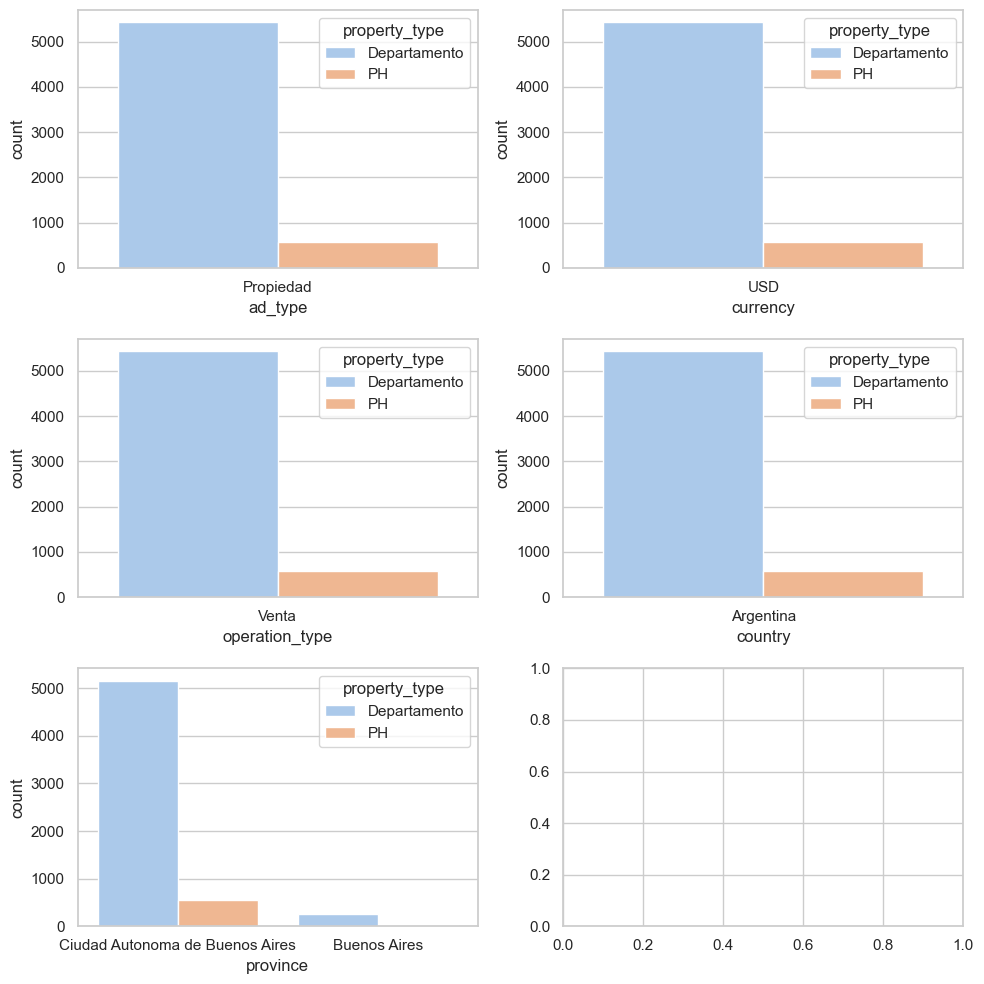

In [17]:
fig, axes = plt.subplots(3,2, figsize=(10,10))

axes = axes.flat

hue='property_type'
cat_cols_temp = cat_cols.copy()
cat_cols_temp.remove(hue)

for i,col in enumerate(cat_cols_temp):
    sns.countplot(x=col, data=df.fillna("Missing"), ax=axes[i], hue=hue)
plt.tight_layout()
plt.show()

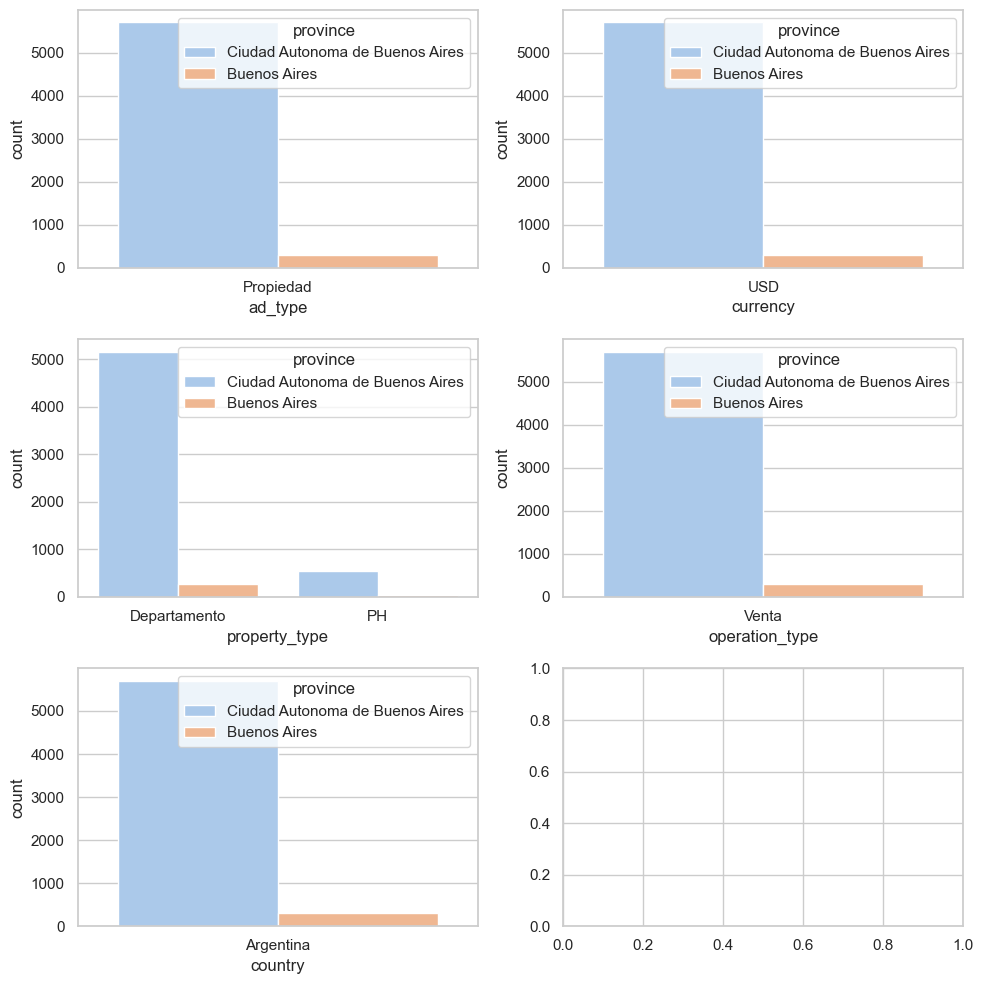

In [18]:
fig, axes = plt.subplots(3,2, figsize=(10,10))

axes = axes.flat

hue='province'
cat_cols_temp = cat_cols.copy()
cat_cols_temp.remove(hue)

for i,col in enumerate(cat_cols_temp):
    sns.countplot(x=col, data=df.fillna("Missing"), ax=axes[i], hue=hue)
plt.tight_layout()
plt.show()

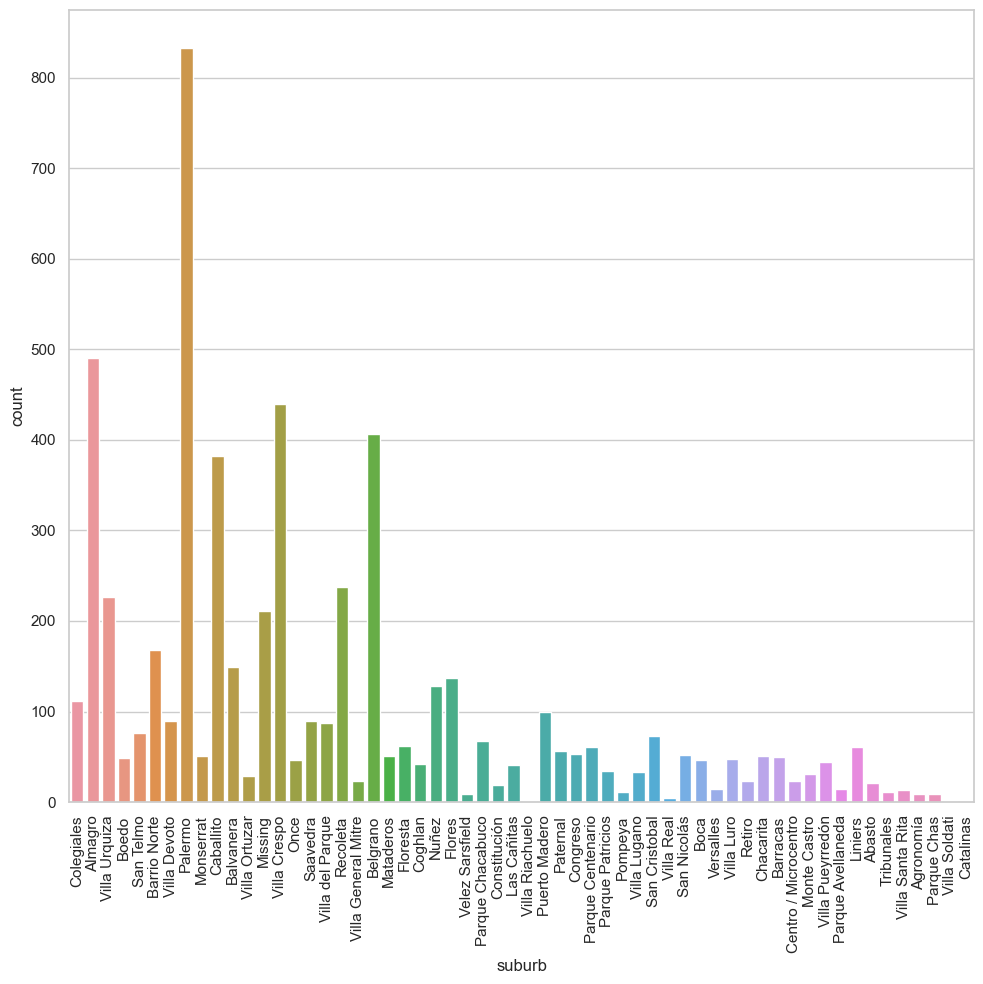

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(x='suburb', data=df[df["province"]==  "Ciudad Autonoma de Buenos Aires"].fillna("Missing"))

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

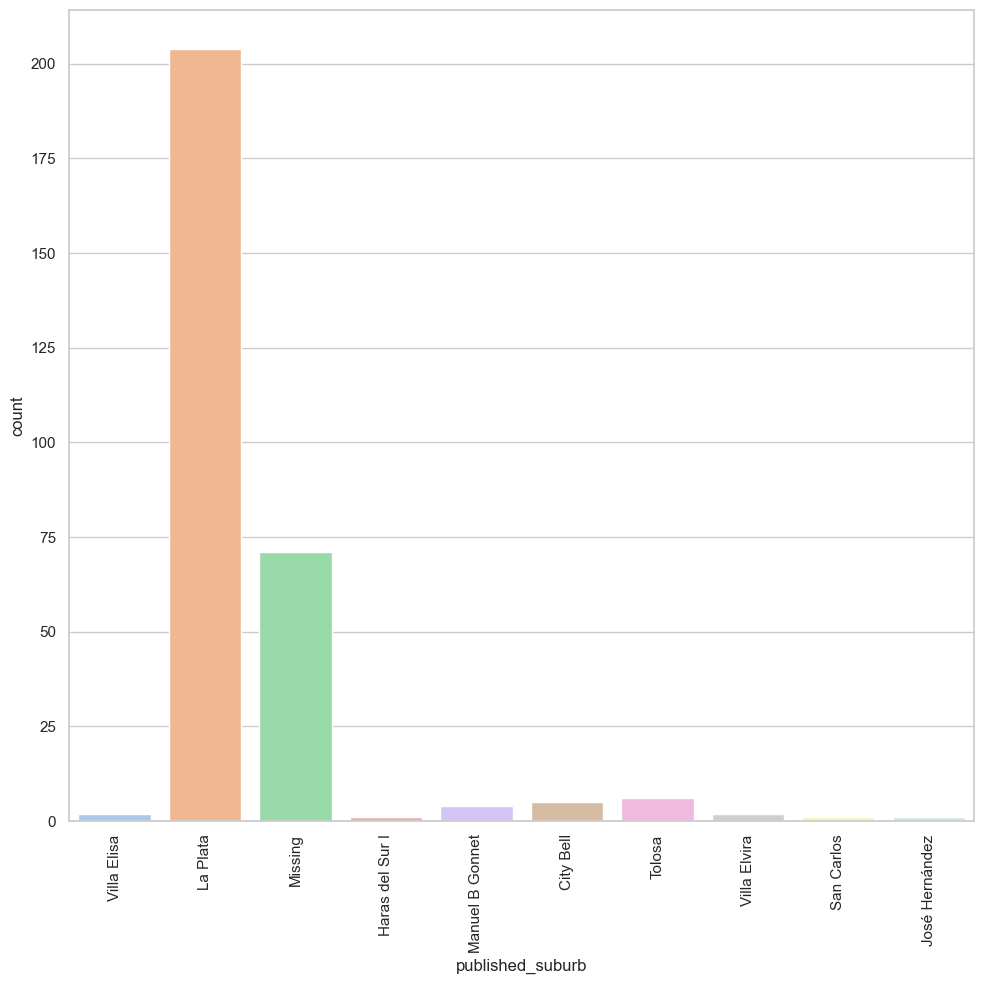

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(x='published_suburb', data=df[df["province"]=="Buenos Aires"].fillna("Missing"))

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

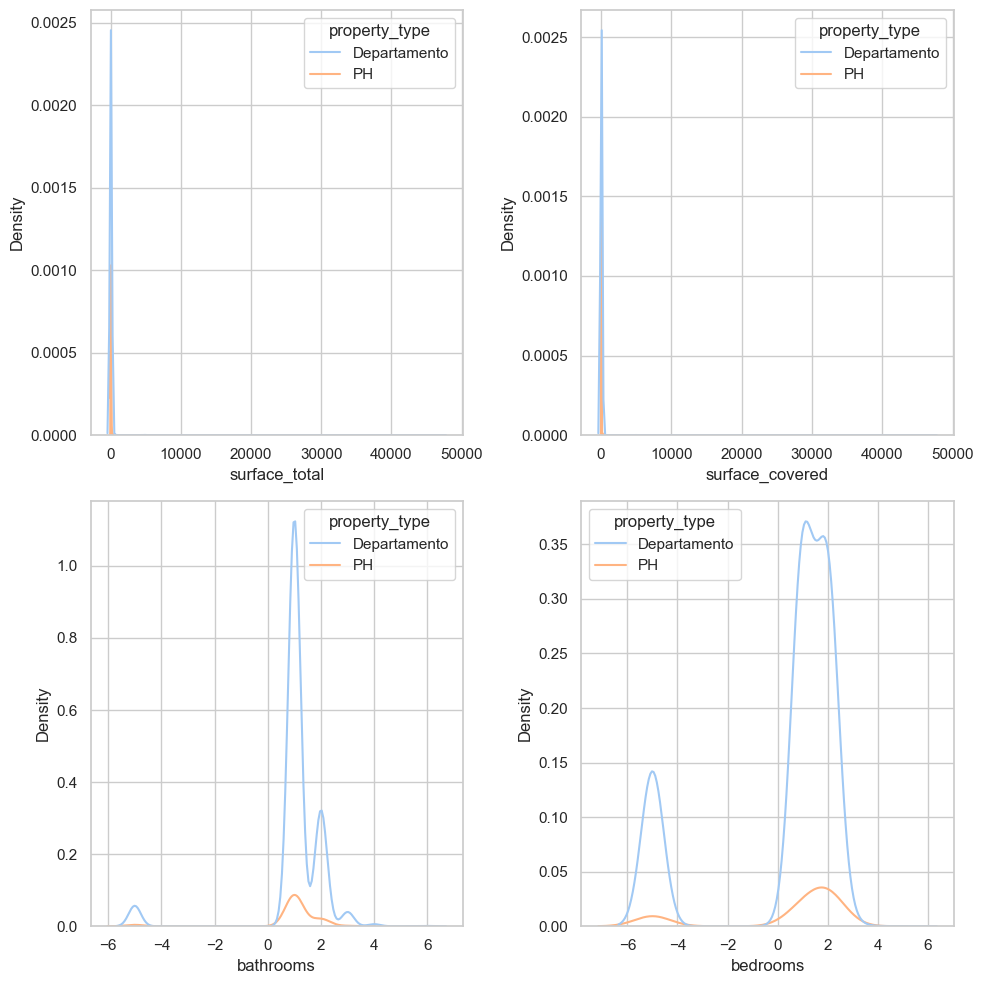

In [21]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

axes = axes.flat

hue='property_type'
cat_cols_temp = cat_cols.copy()
cat_cols_temp.remove(hue)

for i,col in enumerate(num_cols):
    sns.kdeplot(x=col, data=df.fillna(-5), ax=axes[i], hue=hue)

plt.tight_layout()
plt.show()

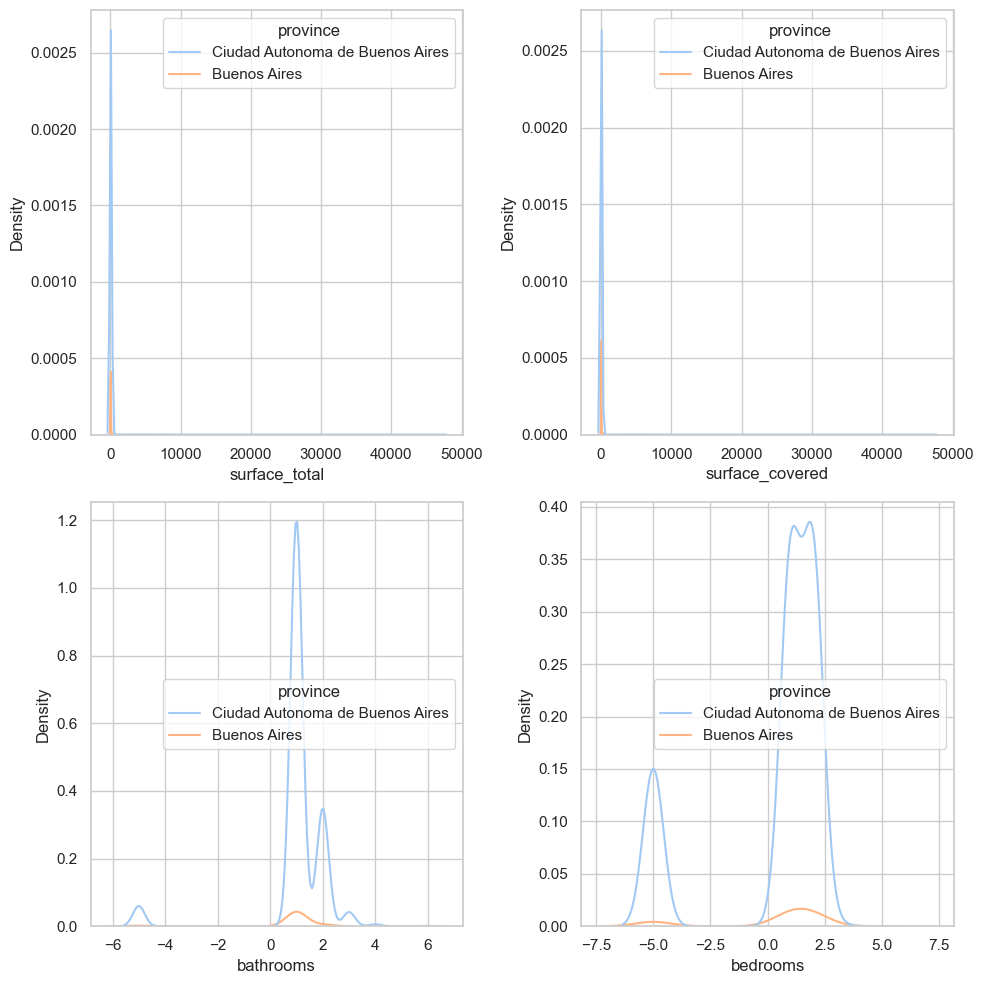

In [22]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

axes = axes.flat

hue='province'
cat_cols_temp = cat_cols.copy()
cat_cols_temp.remove(hue)

for i,col in enumerate(num_cols):
    sns.kdeplot(x=col, data=df.fillna(-5), ax=axes[i], hue=hue)

plt.tight_layout()
plt.show()

In [23]:
df.describe(include='all')

,id,ad_type,lat,lon,country,province,suburb,published_suburb,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,title,description,property_type,operation_type
count,6000.00000,6000,5544.000000,5544.000000,6000,6000,5789,459,6000.000000,4932.000000,5782.000000,4774.000000,4879.000000,6000,6000,6000,6000,6000
unique,NaN,1,NaN,NaN,1,2,58,13,NaN,NaN,NaN,NaN,NaN,1,3870,5093,2,1
top,NaN,Propiedad,NaN,NaN,Argentina,Ciudad Autonoma de Buenos Aires,Palermo,La Plata,NaN,NaN,NaN,NaN,NaN,USD,departamento 2 ambientes venta villa crespo,excelente monoambiente divisible contrafrente ...,Departamento,Venta
freq,NaN,6000,NaN,NaN,6000,5703,833,204,NaN,NaN,NaN,NaN,NaN,6000,143,15,5426,6000
mean,460802.42000,NaN,-34.598136,-58.445369,NaN,NaN,NaN,NaN,2.502667,1.510138,1.275683,91.970674,77.377126,NaN,NaN,NaN,NaN,NaN
std,282441.51075,NaN,0.239306,0.465452,NaN,NaN,NaN,NaN,0.500035,0.512764,0.531740,842.364828,746.081221,NaN,NaN,NaN,NaN,NaN
min,114.00000,NaN,-40.156235,-71.345241,NaN,NaN,NaN,NaN,2.000000,1.000000,1.000000,20.000000,21.000000,NaN,NaN,NaN,NaN,NaN
25%,219797.50000,NaN,-34.616927,-58.460256,NaN,NaN,NaN,NaN,2.000000,1.000000,1.000000,48.000000,43.000000,NaN,NaN,NaN,NaN,NaN
50%,450422.00000,NaN,-34.600578,-58.433935,NaN,NaN,NaN,NaN,3.000000,2.000000,1.000000,60.000000,54.000000,NaN,NaN,NaN,NaN,NaN
75%,674144.00000,NaN,-34.583791,-58.410085,NaN,NaN,NaN,NaN,3.000000,2.000000,1.000000,79.000000,68.000000,NaN,NaN,NaN,NaN,NaN


In [24]:
df = df.copy()

color_scale = [(0, 'orange'), (1,'red')]

fig = None
fig = px.scatter_mapbox(df,
                        lat="lat",
                        lon="lon",
                        hover_name="title",
                        hover_data=["id", "suburb", "published_suburb"],
                        color="province",
                        color_continuous_scale=color_scale,
                        zoom=10,
                        height=800,
                        width=1600)

fig.update_layout(mapbox_style="carto-darkmatter")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()